# Playground Series - Season 3, Episode 12
## Binary Classification with a Kidney Stone Prediction Dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy.stats as stats

pal = sns.color_palette('Paired')

In [2]:
#Data Loading

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_original_train = pd.read_csv('kindey stone urine analysis.csv')

df_train.drop('id', axis = 1, inplace = True)
df_test.drop('id', axis = 1, inplace = True)

## EDA (Exploratory Data Analysis)

### Data Origin

The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Kidney Stone Prediction based on Urine Analysis dataset](https://www.kaggle.com/datasets/vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis). Feature distributions are close to, but not exactly the same, as the original.

### Problem Definition

The problem of Kidney Stone Prediction based on Urine Analysis aims to develop a machine learning model that can accurately predict the presence or absence of kidney stones in a patient based on their urine analysis results.

In [3]:
# Dataset Size

num_rows = df_train.shape[0]
num_rows_test = df_test.shape[0]

print('Number of rows in train dataset: ', num_rows)
print('Number of rows in test dataset: ', num_rows_test)
print('Total number of rows in dataset: ', num_rows_test + num_rows)

Number of rows in train dataset:  414
Number of rows in test dataset:  276
Total number of rows in dataset:  690


In [4]:
df_train.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


In [5]:
df_train.tail()

,gravity,ph,osmo,cond,urea,calc,target
409,1.011,5.21,527,21.4,75,1.53,0
410,1.024,5.53,577,19.7,224,0.77,0
411,1.018,6.28,455,22.2,270,7.68,1
412,1.008,7.12,325,12.6,75,1.03,1
413,1.011,6.13,364,9.9,159,0.27,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


### Available Features

- **gravity** - The density of the urine relative to water - Float
- **ph** - Ph of the urine - Float
- **osmo** - Osmolarity (mOsm) - Int
- **cond** - Conductivity (mMho) - Float
- **urea** - Urea concentration in millimoles per litre - Int
- **calc** - Calcium concentration (CALC) in millimolesllitre - Float

### Is there any missing values?

#### Missing values in train set

In [7]:
# Missing Values

df_train_null = df_train.isnull().sum()
df_train_null

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

#### Missing values in test set

In [8]:
df_test_null = df_test.isnull().sum()
df_test_null

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

In [9]:
df_train.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [10]:
df_test.describe()

,gravity,ph,osmo,cond,urea,calc
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.018330,5.939312,654.891304,21.886594,280.985507,4.076848
std,0.006569,0.607143,236.361932,7.346069,134.877856,3.088524
min,1.005000,4.900000,187.000000,5.100000,64.000000,0.170000
25%,1.014000,5.530000,456.000000,17.400000,168.500000,1.527500
50%,1.019000,5.730000,658.000000,23.600000,282.000000,3.230000
75%,1.023250,6.210000,843.250000,27.600000,385.000000,5.540000
max,1.034000,7.940000,1236.000000,38.000000,620.000000,14.340000


In [11]:
df_original_train.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


### Distributions

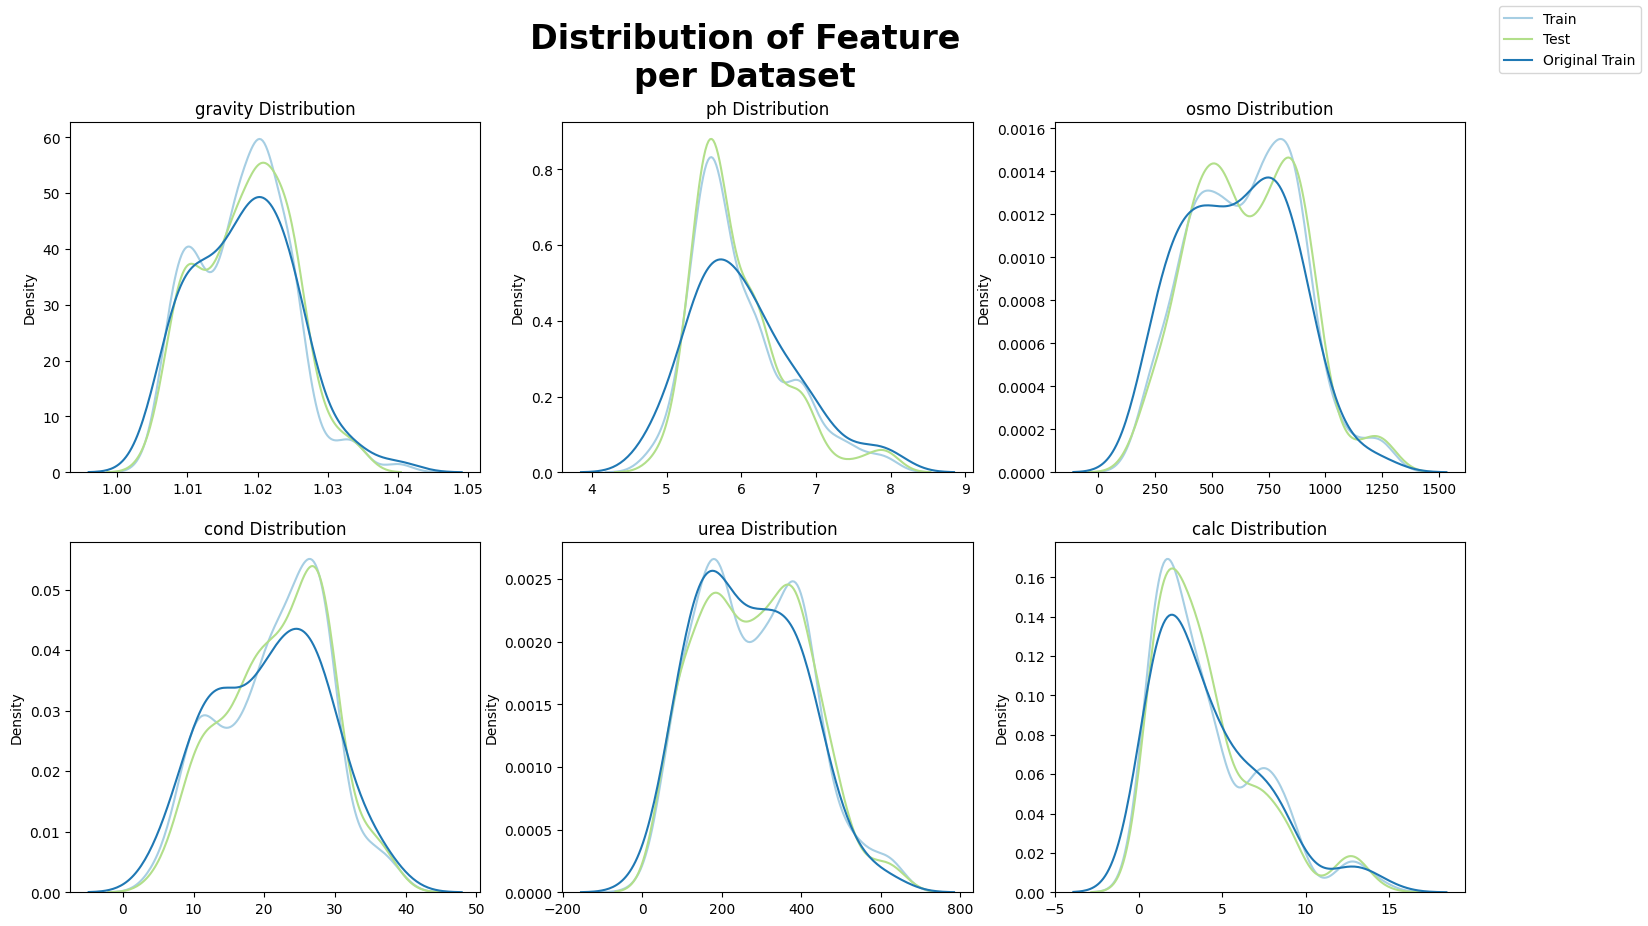

In [12]:
# Make kernel density estimate of each feature (gravity, ph, osmo, cond, urea, calc)

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

col_names = df_train.keys().values.tolist()
for i in range(2):
    for j in range(3):
      sns.kdeplot(df_train[col_names[i*3+j]], ax=ax[i, j], color=pal[0])
      sns.kdeplot(df_test[col_names[i*3+j]], ax=ax[i, j], color=pal[2])
      sns.kdeplot(df_original_train[col_names[i*3+j]], ax=ax[i, j], color=pal[1])

      ax[i,j].set_title(f'{col_names[i*3+j]} Distribution')
      ax[i,j].set_xlabel(None)
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test', 'Original Train'])
plt.show()


#### Key observations

- Train and test has similar distributions, so we can trust Cross-Validation
- The variable "ph" and "calc" are highly right-skewed. This means that there are many more lower values than higher values and that the tail of the distribution extends far to the right.


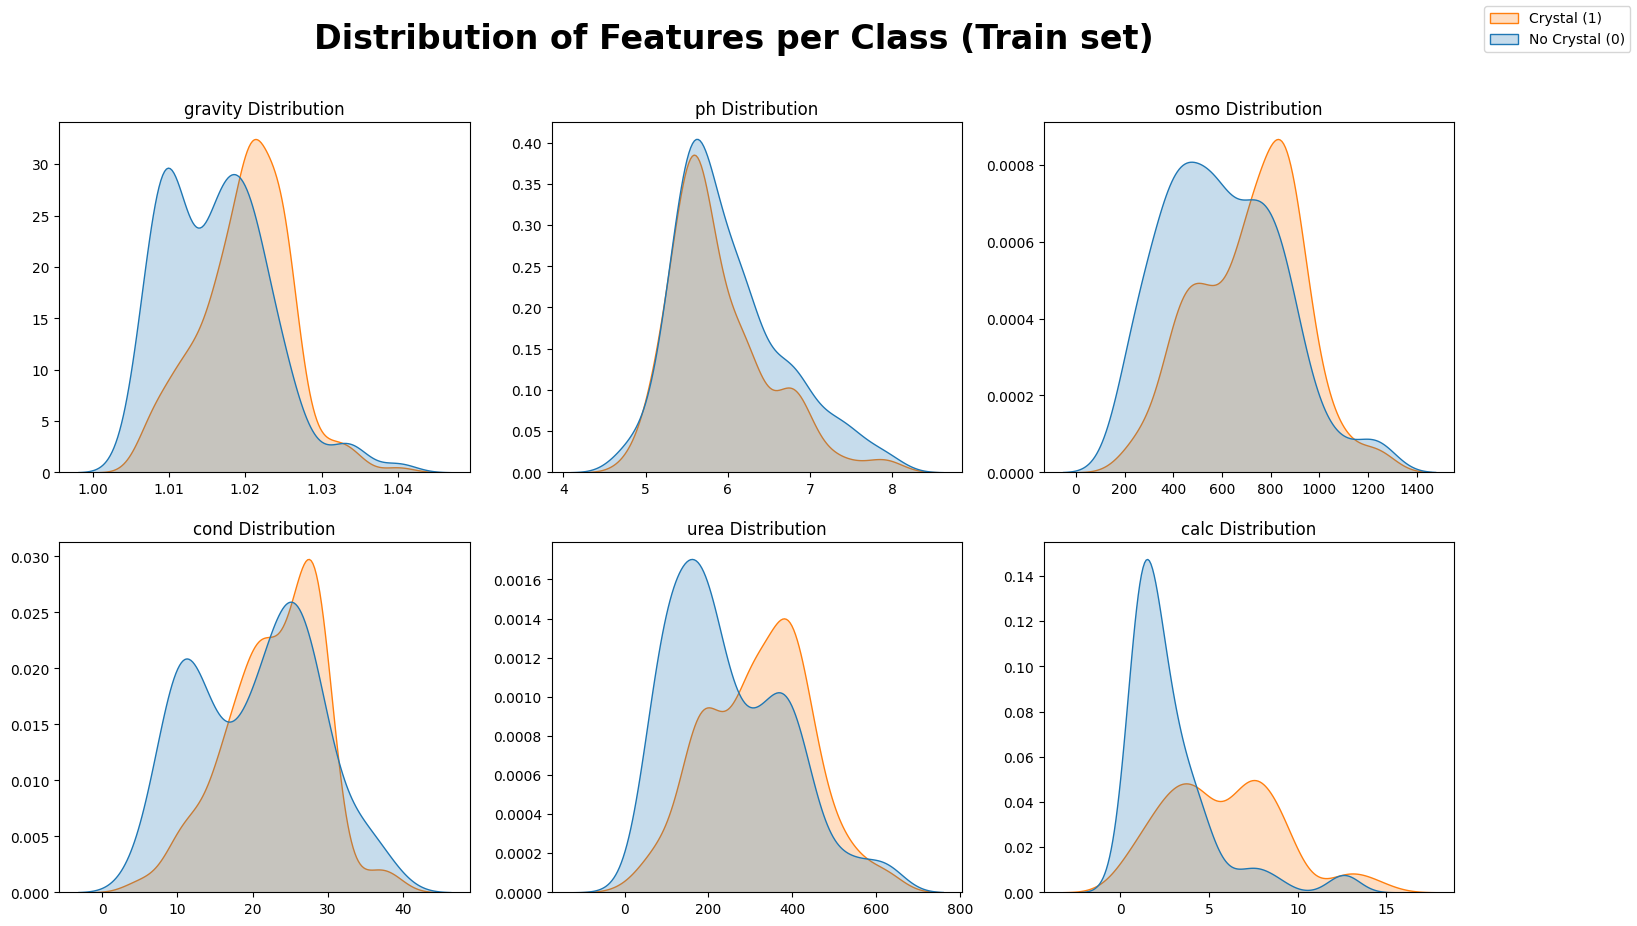

In [13]:
# Make kernel density estimate of each feature grouped by target

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

col_names = df_train.keys().values.tolist()
for i in range(2):
    for j in range(3):
      sns.kdeplot(data = df_train, x = col_names[i*3+j], ax=ax[i,j], color=pal[0], fill = True, legend = False, hue = 'target')

      ax[i,j].set_title(f'{col_names[i*3+j]} Distribution')
      ax[i,j].set_xlabel(None)
      ax[i,j].set_ylabel(None)
fig.suptitle('Distribution of Features per Class (Train set)\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Crystal (1)', 'No Crystal (0)'])
plt.show()

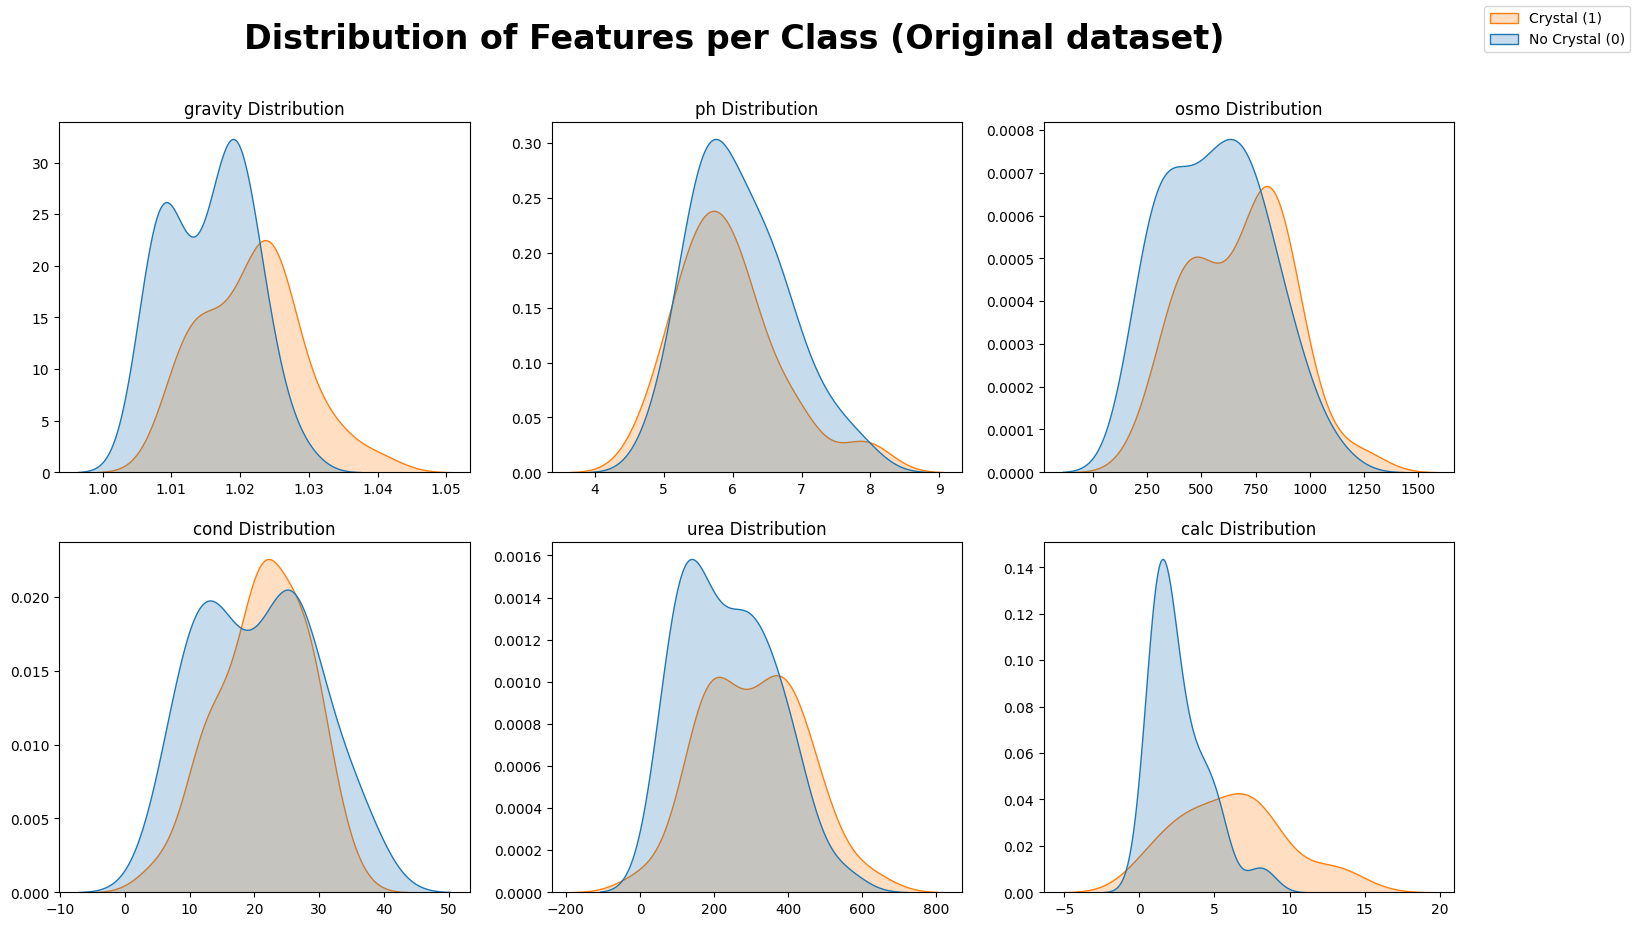

In [14]:
# Make kernel density estimate of each feature grouped by target

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

col_names = df_train.keys().values.tolist()
for i in range(2):
    for j in range(3):
      sns.kdeplot(data = df_original_train, x = col_names[i*3+j], ax=ax[i,j], color=pal[0], fill = True, legend = False, hue = 'target')

      ax[i,j].set_title(f'{col_names[i*3+j]} Distribution')
      ax[i,j].set_xlabel(None)
      ax[i,j].set_ylabel(None)
fig.suptitle('Distribution of Features per Class (Original dataset)\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Crystal (1)', 'No Crystal (0)'])
plt.show()

#### Key Observations

- It can be observed that gravity, urea, and calc have a positive impact on the target. These relationships will be confirmed later.

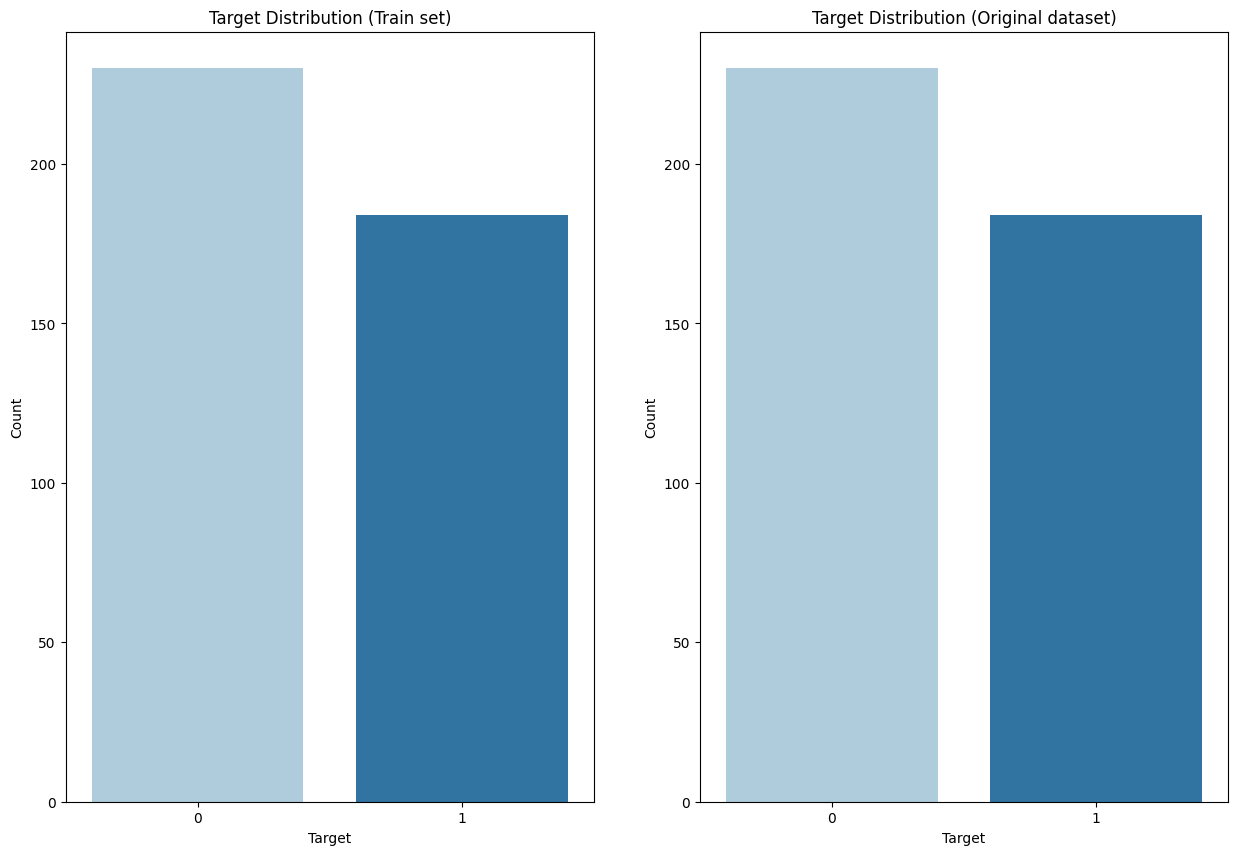

In [15]:
# Make a barplot that shows the target distribution

fig, ax = plt.subplots(1,2,figsize=(15, 10))

sns.barplot(x = df_train['target'].value_counts().index, y = df_train['target'].value_counts().values, ax = ax[0], palette = pal)
ax[0].set_title('Target Distribution (Train set)')
ax[0].set_xlabel('Target')
ax[0].set_ylabel('Count')

sns.barplot(x = df_original_train['target'].value_counts().index, y = df_train['target'].value_counts().values, ax = ax[1], palette = pal)
ax[1].set_title('Target Distribution (Original dataset)')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Count')

plt.show()

#### Key observations

- Target has a relative balanced distribution

### Correlation

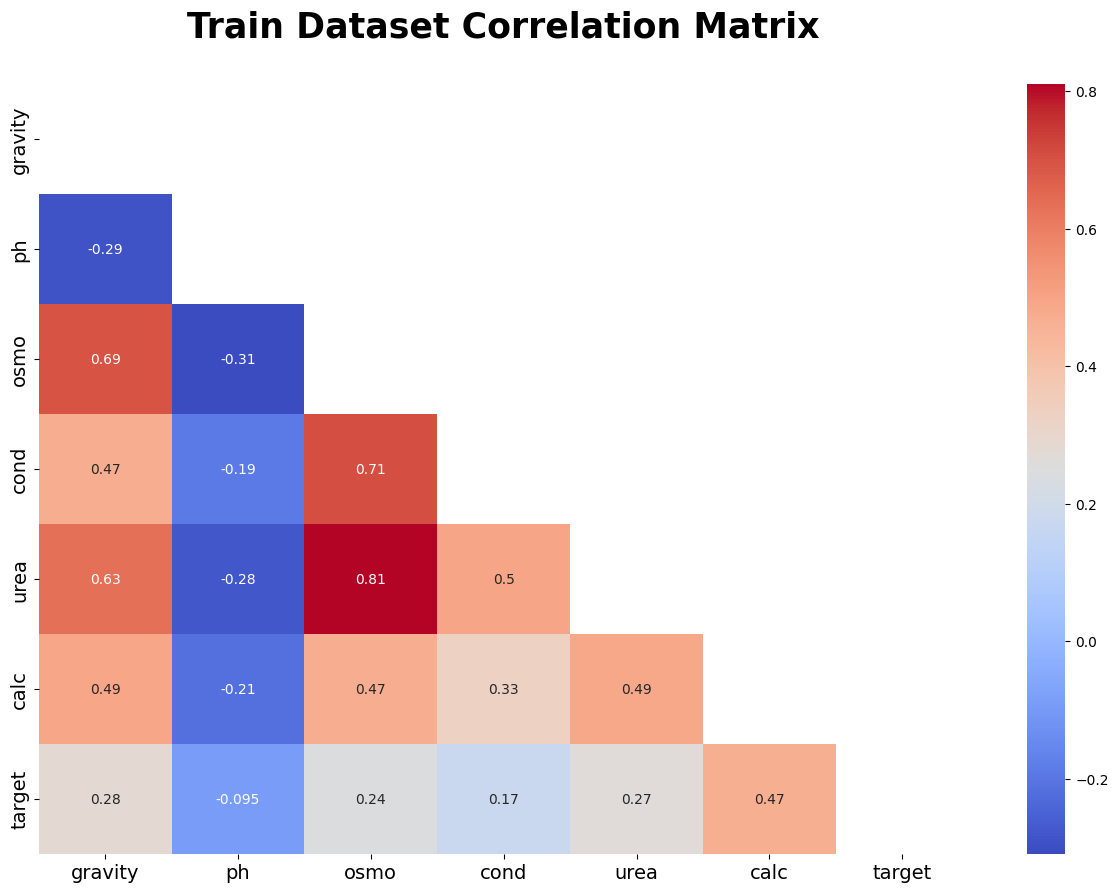

In [16]:
corr = df_train.corr()
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask = mask)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.title(f'Train Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
plt.show()

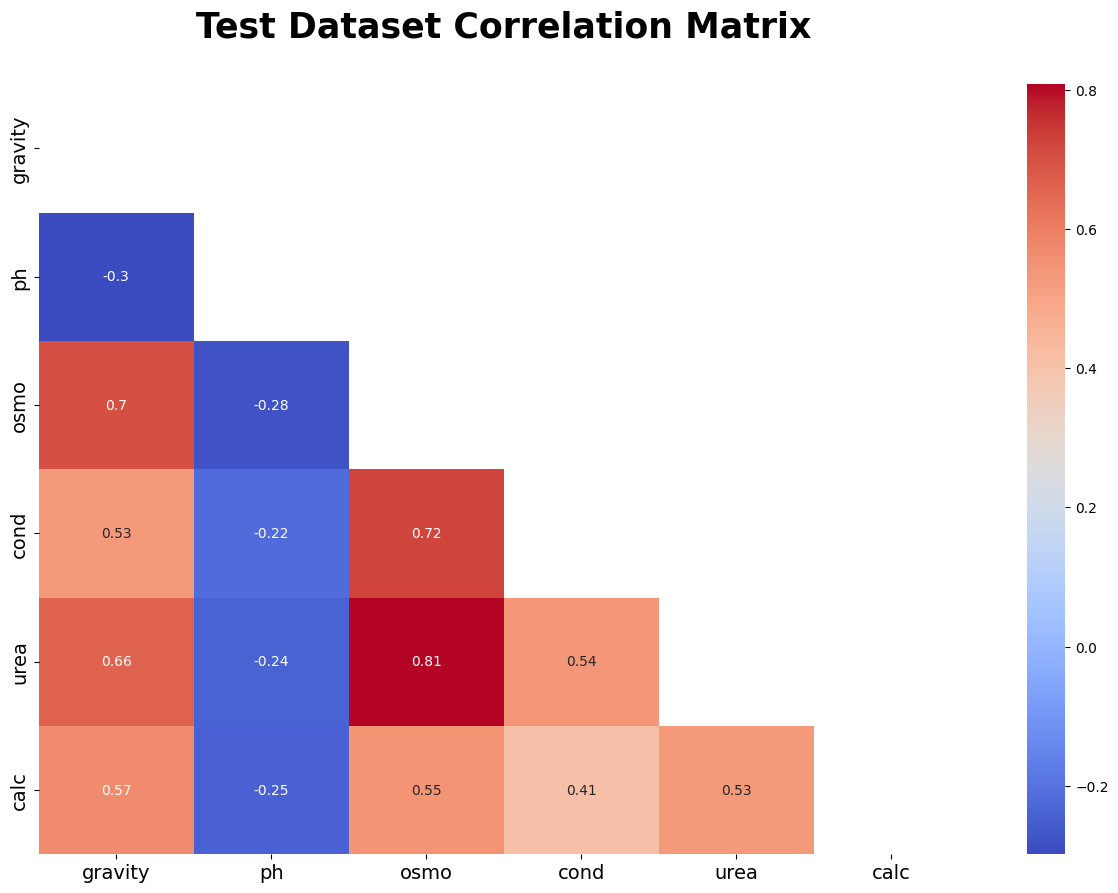

In [17]:
corr = df_test.corr()
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask = mask)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.title(f'Test Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
plt.show()

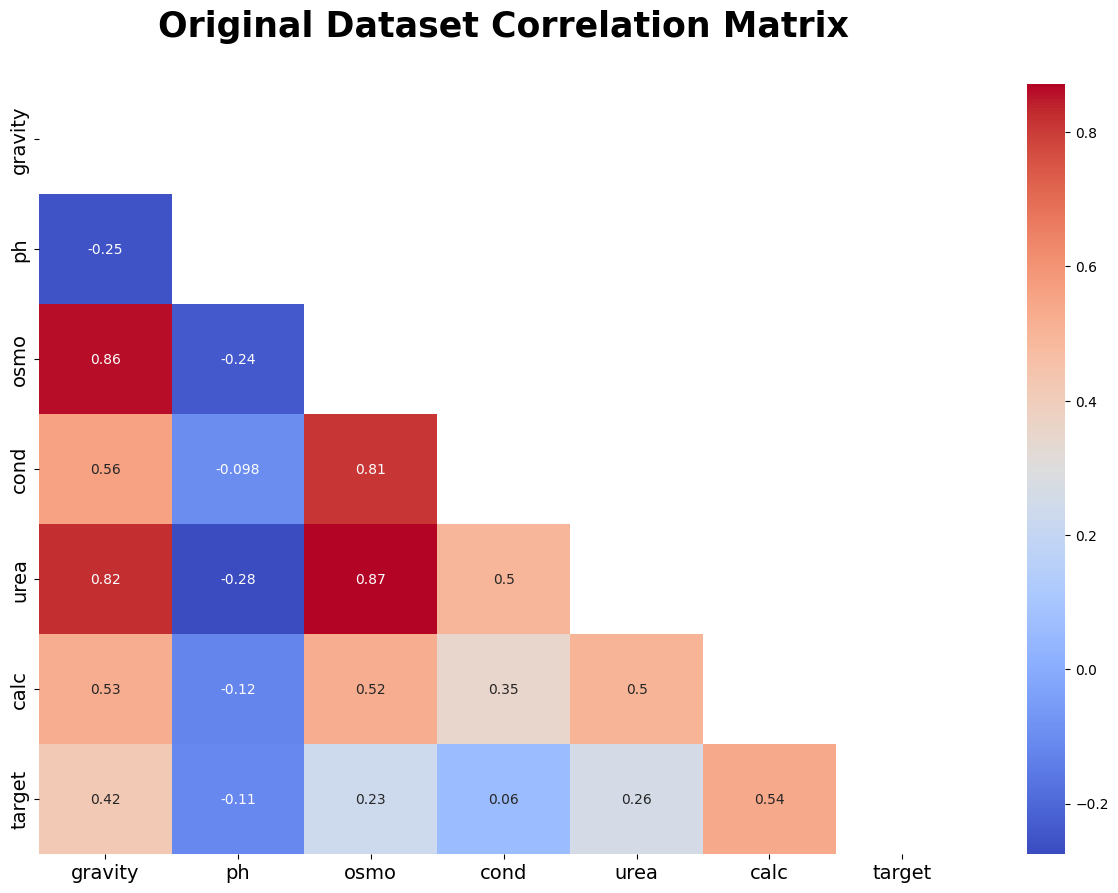

In [18]:
corr = df_original_train.corr()
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask = mask)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.title(f'Original Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
plt.show()

#### Key Observations

- All features except ph has a positive correlation with each other
- Target is moderately correlated with calc and gravity


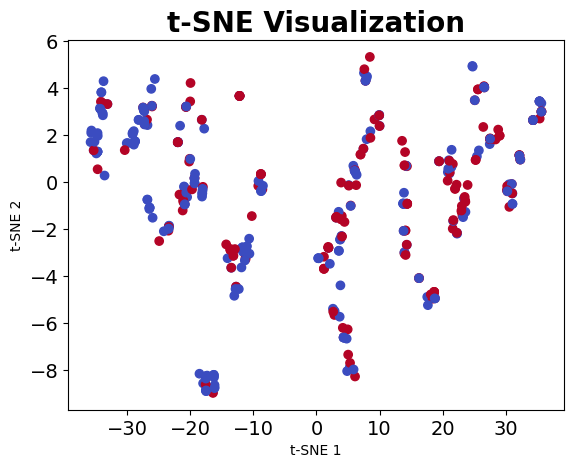

In [29]:
# Create a t-SNE object
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(df_train.drop('target', axis=1))

# Plot the t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_train['target'], cmap='coolwarm')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization',fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

#### Key Observations

- The precense of overlapping clusters suggests that some data points may be ambiguous or have features that are shared by multiple classes or categories.

## Data Cleaning and Feature Engineering

For the sake of having a bigger training set, we are going to merge the original dataset with the dataset of the competition.

In [33]:
df_train = pd.concat([df_train, df_original_train])

print(f'There are {df_train.duplicated(subset = list(df_train)[0:-1]).value_counts()[0]} non-duplicate values out of {df_train.count()[0]} rows in train dataset')

There are 491 non-duplicate values out of 493 rows in train dataset


After that, we delete the duplicates.

In [34]:
df_train.drop_duplicates(subset = list(df_train)[0:-1], inplace = True, keep = 'first')

In [ ]:
X = df_train.drop('target', axis=1)
y = df_train['target']

